# **Loading Probability Distributions in a Quantum Circuit (Dasgupta & Paine, 2022)**
---

Replicating results from the paper Loading Probability Distributions in a Quantum Circuit (Dasgupta & Paine, 2022), with a few additional examples.

- Platform: Tested on Windows 10 with Python 3.9

In [ ]:
#Import libraries
import numpy as np
from qiskit import *

## Section 1) Creating our first circuit

Based on the IBM tutorial (https://quantum-computing.ibm.com/lab/docs/iql/first-circuit), we create our first quantum circuit.

In [ ]:
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# END

In [ ]:
# Execute
#--------

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Return counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'11': 498, '00': 502}


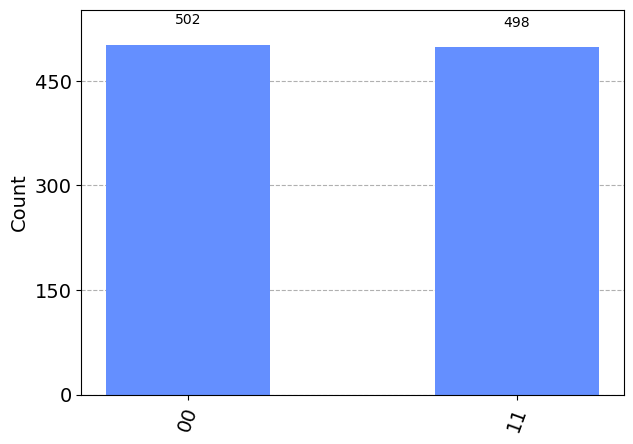

In [ ]:
from qiskit.visualization import plot_histogram

# Plot a histogram
plot_histogram(counts)

# END

## Section 2) Uniform distribution

Replicating Figure 4 from the paper.

In [ ]:
def run_circuit_figure4(theta_1, theta_2):

    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)

    #Create a Quantum Circuit acting on the q register
    circuit = QuantumCircuit(qr, cr)

    #Apply gates
    circuit.ry(theta_1, qr[1])
    circuit.ry(theta_2, qr[0])

    # Map the quantum measurement to the classical bits
    circuit.measure(qr, cr)

    # Use Aer's qasm_simulator
    simulator = Aer.get_backend('qasm_simulator')

    # Execute the circuit on the qasm simulator
    job = execute(circuit, simulator, shots=1000)

    # Grab results from the job
    result = job.result()

    # Return counts
    counts = result.get_counts(circuit)

    #Return counts
    return counts

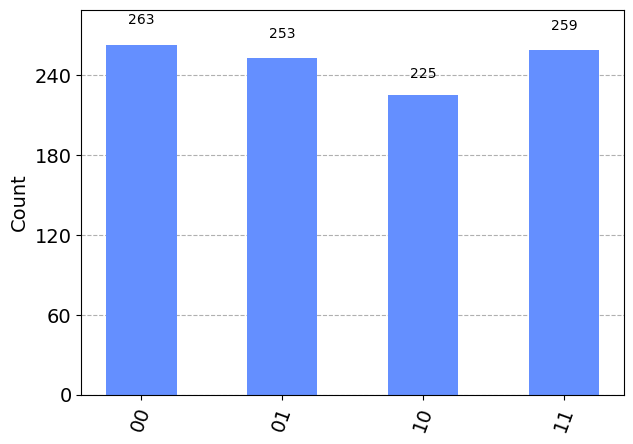

In [ ]:
theta_1 = np.pi/2
theta_2 = np.pi/2
counts = run_circuit_figure4(theta_1, theta_2)
plot_histogram(counts)

## 3) Particular case of symmetric distributions

Replicating Figure 5 from the paper

In [ ]:
def run_circuit_figure5(theta_1, theta_2):

    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)

    #Create a Quantum Circuit acting on the q register
    circuit = QuantumCircuit(qr, cr)

    #Apply gates
    circuit.ry(theta_1, qr[1])
    circuit.ry(theta_2, qr[0])
    circuit.cx(qr[1], qr[0])

    # Map the quantum measurement to the classical bits
    circuit.measure(qr, cr)

    # Use Aer's qasm_simulator
    simulator = Aer.get_backend('qasm_simulator')

    # Execute the circuit on the qasm simulator
    job = execute(circuit, simulator, shots=1000)

    # Grab results from the job
    result = job.result()

    # Return counts
    counts = result.get_counts(circuit)

    #Return counts
    return counts

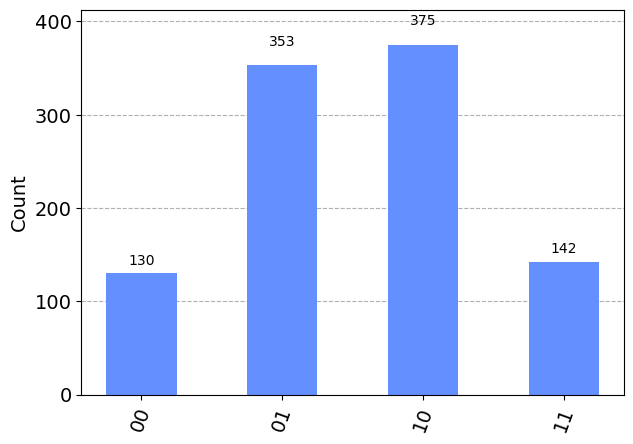

In [ ]:
theta_1 = np.pi/2
theta_2 = np.pi*2/3
counts = run_circuit_figure5(theta_1, theta_2)
plot_histogram(counts)

## 4) Particular case of symmetric distributions with a 3-qubit system

Replicating Figure 7 from the paper.

In [ ]:
def run_circuit_figure7(theta):

    qr = QuantumRegister(3)
    cr = ClassicalRegister(3)

    #Create a Quantum Circuit acting on the q register
    circuit = QuantumCircuit(qr, cr)

    #Apply gates
    circuit.ry(theta[0], qr[2])
    circuit.ry(theta[1], qr[1])
    circuit.cx(qr[2], qr[1])
    circuit.ry(theta[2], qr[0])
    circuit.cx(qr[2], qr[0])

    # Map the quantum measurement to the classical bits
    circuit.measure(qr, cr)

    # Use Aer's qasm_simulator
    simulator = Aer.get_backend('qasm_simulator')

    # Execute the circuit on the qasm simulator
    job = execute(circuit, simulator, shots=1000)

    # Grab results from the job
    result = job.result()

    # Return counts
    counts = result.get_counts(circuit)

    #Return counts
    return counts

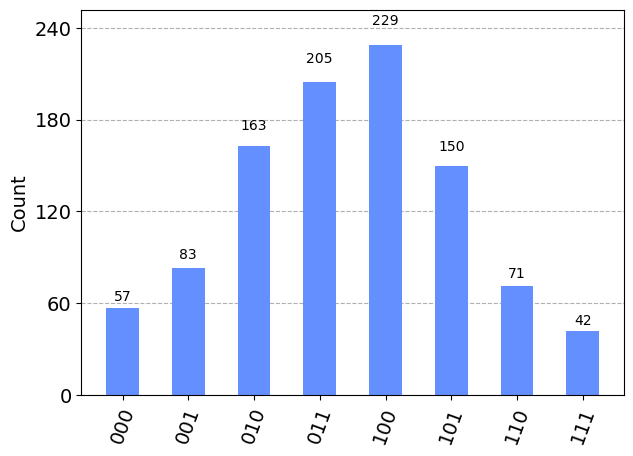

In [ ]:
theta = [np.pi/2, np.pi*2/3, np.pi*100/180]
counts = run_circuit_figure7(theta)
plot_histogram(counts)

## Section 5) Circuit for asymmetric distributions

Replicating Figure 11 from the paper.

In [ ]:
import itertools

In [ ]:
def run_circuit_figure12(theta):

    n_qubits = 5

    qr = QuantumRegister(n_qubits)
    cr = ClassicalRegister(n_qubits)

    #Create a Quantum Circuit acting on the q register
    circuit = QuantumCircuit(qr, cr)

    #Apply gates
    circuit.ry(theta[0], qr[4])
    circuit.x(qr[4])
    circuit.cry(theta[1], target_qubit=qr[3], control_qubit=qr[4])
    circuit.cry(theta[2], target_qubit=qr[2], control_qubit=qr[4])
    circuit.cry(theta[3], target_qubit=qr[1], control_qubit=qr[4])
    circuit.cry(theta[4], target_qubit=qr[0], control_qubit=qr[4])
    circuit.cx(target_qubit=qr[0], control_qubit=qr[3])
    circuit.cx(target_qubit=qr[1], control_qubit=qr[3])
    circuit.cx(target_qubit=qr[2], control_qubit=qr[3])
    circuit.x(qr[3])
    circuit.mcry(theta[5], q_target=qr[2], q_controls=[qr[3], qr[4]])
    circuit.mcry(theta[6], q_target=qr[1], q_controls=[qr[3], qr[4]])
    circuit.mcry(theta[7], q_target=qr[0], q_controls=[qr[3], qr[4]])
    circuit.x(qr[3])
    circuit.x(qr[4])
    circuit.cry(theta[8], target_qubit=qr[3], control_qubit=qr[4])
    circuit.cry(theta[9], target_qubit=qr[2], control_qubit=qr[4])
    circuit.cry(theta[10], target_qubit=qr[1], control_qubit=qr[4])
    circuit.cry(theta[11], target_qubit=qr[0], control_qubit=qr[4])



    # Map the quantum measurement to the classical bits
    circuit.measure(qr, cr)

    # Use Aer's qasm_simulator
    simulator = Aer.get_backend('qasm_simulator')

    # Execute the circuit on the qasm simulator
    job = execute(circuit, simulator, shots=1000)

    # Grab results from the job
    result = job.result()

    # Return counts
    counts = result.get_counts(circuit)

    counts = result.get_counts()
    all_bitstrings = ("".join(states) for states in itertools.product("01", repeat=n_qubits))
    counts = {key: counts.get(key, 0) for key in all_bitstrings}

    #Return counts
    return counts

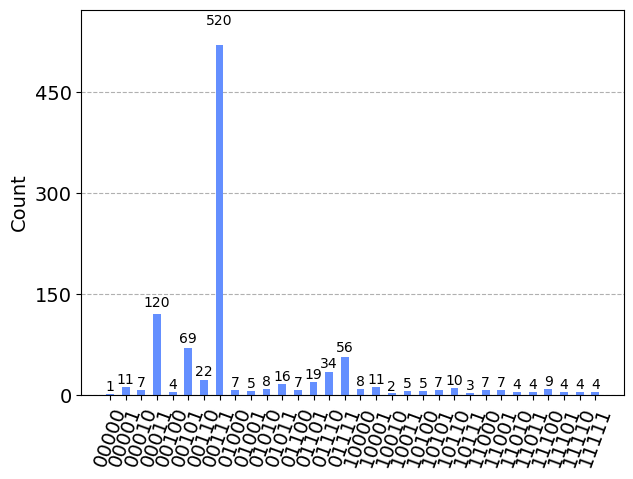

In [ ]:
theta = [np.pi*0.20, np.pi*0.25, np.pi*0.30, np.pi*0.35, np.pi*0.40, np.pi*0.42, np.pi*0.44, np.pi*0.46, np.pi*0.47, np.pi*0.48, np.pi*0.49, np.pi*0.49]
counts = run_circuit_figure12(theta)
plot_histogram(counts)

## Section 6) Variational solver

We choose an initial $\theta$ for the circuit presented in the Section 4.

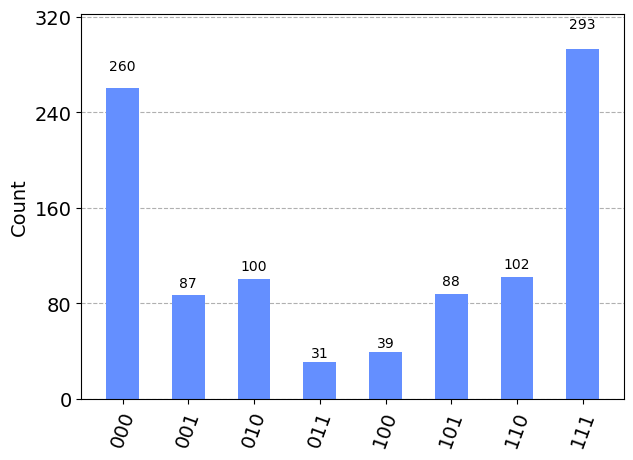

In [ ]:
#Circuit for symmetric distribution (3-qubit)
theta = [np.pi/2, np.pi/3, np.pi/3]
counts = run_circuit_figure7(theta)
plot_histogram(counts)

We will use the variational solver to approximate a N(0, 0.5). We generate a histogram with $2^3$ bins using this desired distribution.

In [ ]:
#Normal distribution
data = np.random.normal(0, 0.5, size = 1000)
real_empirical_dist = np.array(np.histogram(data, bins=2**3)[0])
real_empirical_dist

array([  5,  35, 145, 246, 259, 222,  70,  18], dtype=int64)

In [ ]:
import matplotlib.pyplot as plt

(array([0.01280323, 0.08962263, 0.37129377, 0.62991909, 0.6632075 ,
        0.56846357, 0.17924527, 0.04609164]),
 array([-1.64452371, -1.25399737, -0.86347102, -0.47294468, -0.08241833,
         0.30810801,  0.69863436,  1.0891607 ,  1.47968705]),
 <BarContainer object of 8 artists>)

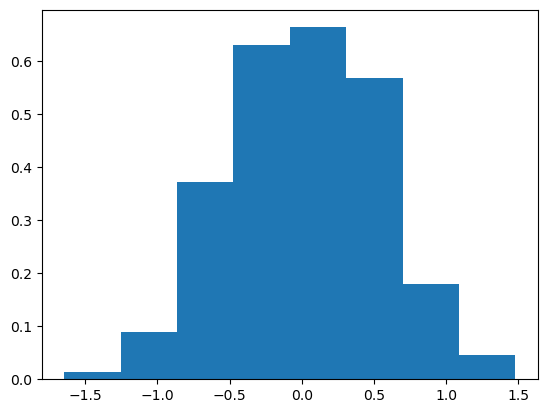

In [ ]:
plt.hist(data, density=True, bins=2**3)

We define the distance metric between histograms as described in the report.

In [ ]:
def opt_function(theta):

    counts = run_circuit_figure7(theta)
    estimated_empirical_dist = np.array(list(counts.values()))

    result = (estimated_empirical_dist - real_empirical_dist)**2
    return sum(result)

We use the minimize function from Scipy.Optimize package for the optimization routines.

In [ ]:
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize

linear_constraint = LinearConstraint([[1, 0, 0], [0, 1, -1], [0, 0, 1]], [np.pi/2, 0, np.pi/2], [np.pi/2, 2*np.pi, 5*np.pi/2])

res = minimize(opt_function, theta, method='trust-constr',
               constraints=[linear_constraint])

In [ ]:
#Final theta
res.x

array([1.57079633, 1.68519243, 1.57095453])

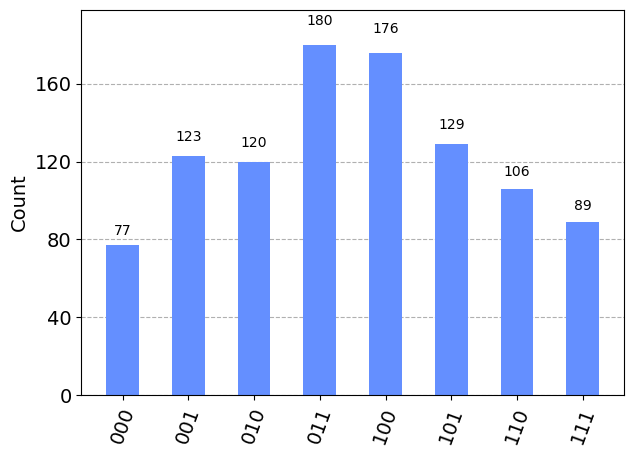

In [ ]:
#Simulation with final theta
counts = run_circuit_figure7(res.x)
plot_histogram(counts)